# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


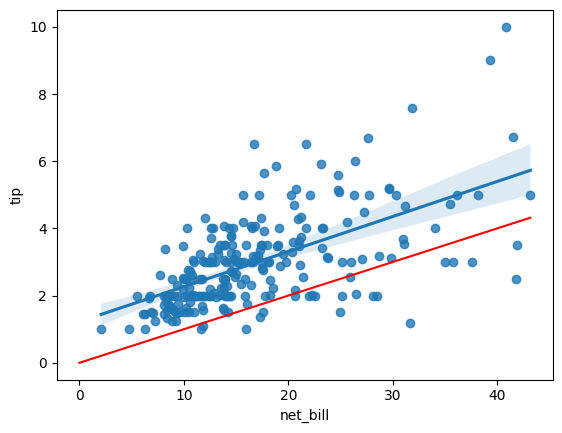

In [ ]:
sns.regplot(y = 'tip', x ='net_bill', data = tips[tips['tip_pct']<0.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = 0.1*x

plt.plot(x,y, '-r', label='linha dos 10%')

In [ ]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        20:58:23   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.52e-06
Time:                        20:58:24   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

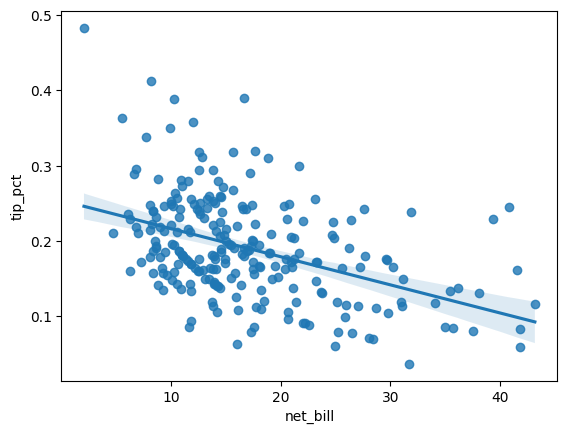

In [ ]:
sns.regplot(y = 'tip_pct', x ='net_bill', data = tips[tips['tip_pct']<0.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = 0.1*x

plt.plot()

reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()



### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

**Comparação gráfica**

* Gráfico 1: *tip* x *net_bill*
* Gráfico 2: *tip_pct* x *net_bill*


1. Comparando os gráficos podemos ver que quanto maior o total de compra, maior a gorgeta porém, ela se mostra maior apenas quantitativamente, em porcentagem comparando a gorgeta com o valor total da compra ela é menor.

2. Podemos ver que o R² é consideravelmente no para o **gráfico 1**

3. O ideal seria ter mais informações no banco de dados para ver se o R² se mantém ou acabará demonstrando alguma volatilidade.



### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [ ]:
# 1) obtenha o valor predito pred para tip_pct (dica, veja o atributo reg.fittedvalues)
X = tips[['net_bill', 'size']]
y = tips['tip_pct']

model_pct = sm.OLS(y, X).fit()

tips['predicted_tip_pct'] = model_pct.fittedvalues

In [ ]:
# 2) obtenha o valor predito para tip como tip_pct * net_bill
tips['predicted_tip'] = tips['predicted_tip_pct'] * tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,predicted_tip_pct,predicted_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.120062,1.918597
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.245368,2.129794
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.207672,3.636335
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.101321,2.063910
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.286999,6.021247


In [ ]:
# 3) calcule o  R2  do modelo para tip
rss = ((tips['tip'] - tips['predicted_tip']) ** 2).sum()
tss = ((tips['tip'] - tips['tip'].mean()) ** 2).sum()
r_squared_tip = 1 -  (rss / tss)
r_squared_tip


-1.1854064393462052

In [ ]:
# 4) compare esse  R2  com o do item 1

r_squared_tip_pct = model_pct.rsquared

print(f"R² para tip_pct: {r_squared_tip_pct}")
print(f"R² para tip (usando predicted_tip_pct * net_bill): {r_squared_tip}")

R² para tip_pct: 0.5130316250516487
R² para tip (usando predicted_tip_pct * net_bill): -1.1854064393462052
